<a href="https://colab.research.google.com/github/SalehMehrabani/PyTorch-Deep-Learning/blob/main/NN4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow


In [ ]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Data: Preparing and Loading


In [ ]:
#Create Known parameter
weight = 0.7
bias = 0.3

#Create  dataset
start=0
end=1
step= 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

### Splitting Data into Training (Training and Validation set) and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

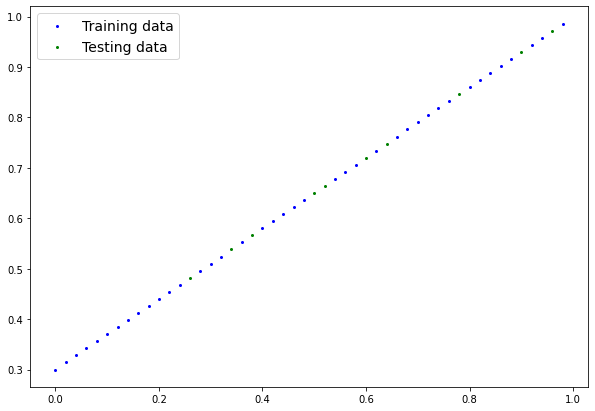

In [ ]:
plot_predictions()

## Building PyTorch Model

In [ ]:
#Create Linear Regression Model Class
#Almost Everything in PyTorch inherent from nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weigths= nn.Parameter(torch.randn(1,
                                           dtype=torch.float),
                                           requires_grad=True)
    self.bias=nn.Parameter(torch.randn(1,
                                      dtype=torch.float),
                                      requires_grad=True)
    
    #FORWARD METHOD TO DEFINE THE COMPUTATIONAL IN THE MODULE
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weigths * x + self.bias

### PyTorch model building Essential

* `torch.nn` - contain all of the building for computational neural networks
* `torch.nn.Parameter` - what parameter should our model try and learn, often PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, You should overwrite `forward()`
* `torch.optim` - this where the optimizer in PyTorch live, they will help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite `forward()`, this method defines what happen in forward computation. 

In [ ]:
# Checking the contents of our PyTorch model - .parameters()

#Create a random seed
torch.manual_seed(42)

#Create an instance of the model
myFirstModel= LinearRegressionModel()

#Check out our modle Parameter
list(myFirstModel.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameter
myFirstModel.state_dict()

OrderedDict([('weigths', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using `torch.inference_mode()`
When we pass data through our model, it's going to run it through the `forward()` method

In [ ]:
#The torch.inference_mode does- is to turn off the keep tracking of the gradient
#It is make your code faster
with torch.inference_mode():
  y_preds=myFirstModel(X_test)

y_preds

#OR - inference node is preferred
#with torch.no_grad():
  #y_preds=myFirstModel(X_test)

tensor([[0.4983],
        [0.8281],
        [0.7140],
        [0.9043],
        [0.5490],
        [0.9423],
        [0.6632],
        [0.6505],
        [0.7393],
        [0.5744]])

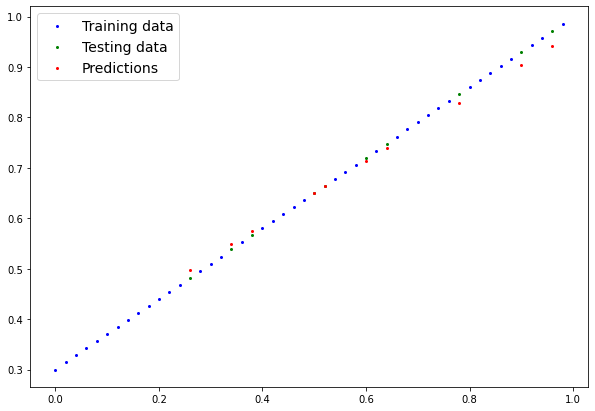

In [ ]:
plot_predictions(predictions=y_preds)

## Train model

The main goal for training a model is to optimized the parameter in which can predicit new data with the least loss 

* **Cost (Loss) function**
One way to measure your model performance is, use loss function, which measure the distance between the real data label and predicted data label with hypothesis function line --> You can use built in PyTorch [Loss Function](https://pytorch.org/docs/stable/nn.html#loss-functions)

* **Optimizer:**
Takes into account the loss of a model and adjusts the model's parameters (e,g: weight & bias)


In [ ]:
#Setup the loss function
loss_fn=nn.L1Loss()

#Setup an Optimizer (Stochastic Gradient Descent) #lr=learning rate
optimizer= torch.optim.SGD(params=myFirstModel.parameters(),
                           lr=0.01)

### Building a TrainingLoop/TestingLoop in PyTorch

Train Loop Necessity:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predicition on data - **Forward Propagation**
2. Calculate the loss (compare the prediction with true labeled)
3. Optimizer zero grad
4. Loss backward - **Back Propagation**
5. Optimizer step - use the optimizer to adjust our model's parameters to try and impore our loss value.

In [ ]:
torch.manual_seed(42)

# An Epoch is one loop through the data - hyperparameter
epochs=100

#Tracking different values
train_loss_values = []
test_loss_values = []
epoch_count = []

#Training loop
for epoch in range(epochs):
  # Make sure gradient tracking is on, and do a pass over the data
  myFirstModel.train() 

  # Forward Pass
  y_pred= myFirstModel(X_train)

  # Calculate the loss
  loss=loss_fn(y_pred, y_train)
  
  # Optimizer zero grad
  optimizer.zero_grad()

  # Perform  Back Propagation
  loss.backward()

  # Step the Optimizer
  # By default how the optimizer changes will acculumate through the loop so ...
  optimizer.step()

#Testing Loop
  #Turns off different settings in the model not needed for evaluation/test
  myFirstModel.eval()
  #trun off gradient tracking 
  with torch.inference_mode():
    #Forward pass
    test_pred=myFirstModel(X_test)

    #Calaculate the test loss
    test_loss=loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

  

Epoch: 0 | MAE Train Loss: 0.340311199426651 | MAE Test Loss: 0.3720795214176178 
Epoch: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470801651477814 
Epoch: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911 
Epoch: 30 | MAE Train Loss: 0.06399796903133392 | MAE Test Loss: 0.06073009967803955 
Epoch: 40 | MAE Train Loss: 0.05161098390817642 | MAE Test Loss: 0.04132990166544914 
Epoch: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398849442601204 
Epoch: 60 | MAE Train Loss: 0.03980403393507004 | MAE Test Loss: 0.029580067843198776 
Epoch: 70 | MAE Train Loss: 0.034203048795461655 | MAE Test Loss: 0.02517164871096611 
Epoch: 80 | MAE Train Loss: 0.028602052479982376 | MAE Test Loss: 0.020763223990797997 
Epoch: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883 


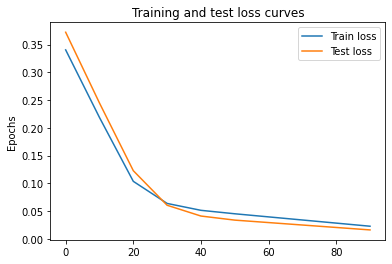

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Epochs")
plt.legend()

##Saving a model in PyTorch

There are 3 main method you should know about for saving and loading a model in pytorch:
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format. 
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [111]:
#Saving a PyTorch Model
from pathlib import Path

#Create module directory
MODEL_PATH= Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#Create Model Save Path
MODEL_NAME= "My_First_MODEL_LINEAR_REGRESSION.pth"
MODEL_SAVE_PATH= MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#Save Model State Dictionary
print(f"Saving madel to:  {MODEL_SAVE_PATH}")
torch.save(obj=myFirstModel.state_dict(),
           f=MODEL_SAVE_PATH)

Saving madel to:  models/My_First_MODEL_LINEAR_REGRESSION.pth


## Loading a PyTorch Model
Since we saved out model `sata_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [112]:
#Loading a PyTorch Model

#Create New instance of our model
LoadedModel= LinearRegressionModel()
print(f'Before loading: {LoadedModel.state_dict()}')
#Load and save the state_dict() values
LoadedModel.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f'After loading: {LoadedModel.state_dict()}')

Before loading: OrderedDict([('weigths', tensor([0.3367])), ('bias', tensor([0.1288]))])
After loading: OrderedDict([('weigths', tensor([0.6344])), ('bias', tensor([0.3333]))])
